<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/05%20Deep%20Learning/Notebooks/RNA_Keras_PIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;" align="left"> <img align="left" width="100%" src="../img/data_science_rec.jpg"/> <br> <br>Redes Neuronales con Keras y Tensorflow II</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Referencias bibliográficas y sitios de interés</u>:
* Ian Goodfellow, Yoshua Bengio, and Aaron Courville. 2016. Deep Learning. The MIT Press.
* [Keras an API for Tensorflow](https://keras.io/getting_started/)
* [Tensorflow: end-to-end open source machine learning platform](https://www.tensorflow.org/)
* [Deep Learning with Keras and TensorFlow](https://www2.mpia-hd.mpg.de/homes/dgoulier/MLClasses/Course%20-%20Deep%20Learning%20with%20Keras%20and%20TensorFlow%20-%20Part%201.html)

# [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

* Descripción:<br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Contenido:<br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Acknowledgements:<br>
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

* Inspiration:<br>
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Módulos de Cómputo Científico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Módulos para ML y visualización

In [2]:
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns

# 1. Pre-procesamiento de los datos

In [3]:
df = pd.read_csv("../Data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Estadísticas

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Gráficos descriptivos

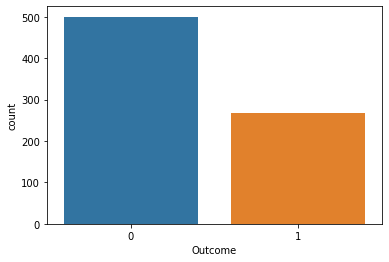

In [5]:
sns.countplot(x="Outcome",data=df)

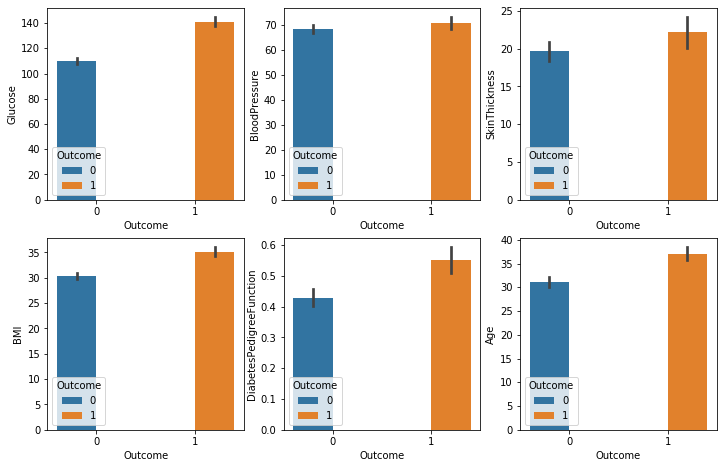

In [6]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=df,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=df,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=df,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=df,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=df,hue="Outcome")

### catplot para la visualización de variables categóricas

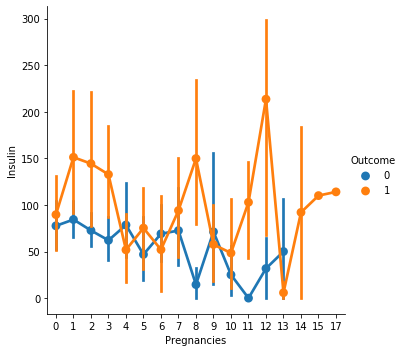

In [7]:
sns.catplot(x='Pregnancies',y='Insulin',data=df,hue='Outcome',kind='point')

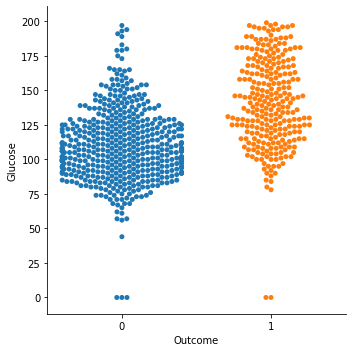

In [8]:
sns.catplot(x='Outcome',y='Glucose',data=df,kind='swarm')

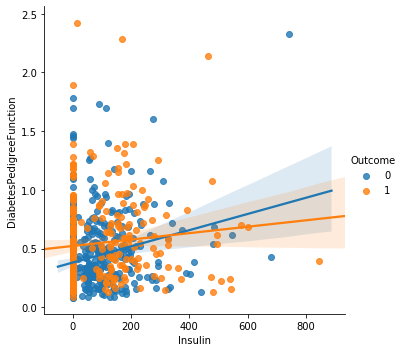

In [9]:
sns.lmplot(x='Insulin',y='DiabetesPedigreeFunction',data=df,hue="Outcome")

### Campos con ceros

In [10]:
cols= df.loc[:, df.columns != 'Outcome'].columns.values.tolist()

def checa_ceros(df, cols):
    col_ceros=[]
    for col in cols:
        ceros=len(df.loc[df[col] == 0, col])
        print('La columna {} tiene {} 0-s'.format(col, ceros))
        if ceros >0:
            col_ceros.append(col)
    return col_ceros

col_ceros=checa_ceros(df, cols)
print(col_ceros)

La columna Pregnancies tiene 111 0-s
La columna Glucose tiene 5 0-s
La columna BloodPressure tiene 35 0-s
La columna SkinThickness tiene 227 0-s
La columna Insulin tiene 374 0-s
La columna BMI tiene 11 0-s
La columna DiabetesPedigreeFunction tiene 0 0-s
La columna Age tiene 0 0-s
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


# Imputación de valores con 0

## Imputación sobre datos de entrenamiento

In [11]:
y = df['Outcome']
X = df.drop('Outcome',axis=1)
print(y.head())
X.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Separación en Entrenamiento, Validación y Prueba

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


### Imputación de X_train con el promedio

In [13]:
def imputa_ceros(data, col):
    noceros = data.loc[data[col] != 0, col].copy()
    prom = np.sum(noceros) / len(noceros)
    k = len(data.loc[data[col] == 0, col])   
    data.loc[data[col] == 0, col ] = prom
    print('Columna: {}, se rellenaron {} datos en cero con el valor: {}'.format(col, k, prom))
    
for col in col_ceros:
    imputa_ceros(X_train, col)

Columna: Pregnancies, se rellenaron 91 datos en cero con el valor: 4.393881453154876
Columna: Glucose, se rellenaron 5 datos en cero con el valor: 121.84729064039409
Columna: BloodPressure, se rellenaron 24 datos en cero con el valor: 72.23898305084745
Columna: SkinThickness, se rellenaron 176 datos en cero con el valor: 28.595890410958905
Columna: Insulin, se rellenaron 290 datos en cero con el valor: 154.33024691358025
Columna: BMI, se rellenaron 7 datos en cero con el valor: 32.35222405271829


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Imputación de X_test

In [14]:
for col in col_ceros:
    imputa_ceros(X_test, col)

Columna: Pregnancies, se rellenaron 20 datos en cero con el valor: 4.888059701492537
Columna: Glucose, se rellenaron 0 datos en cero con el valor: 121.05194805194805
Columna: BloodPressure, se rellenaron 11 datos en cero con el valor: 73.0909090909091
Columna: SkinThickness, se rellenaron 51 datos en cero con el valor: 31.524271844660195
Columna: Insulin, se rellenaron 84 datos en cero con el valor: 161.18571428571428
Columna: BMI, se rellenaron 4 datos en cero con el valor: 32.88333333333334


### Obtenemos los numpy arrays para el entrenamiento

In [15]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


___

# 2. Modelo

In [16]:
# Librerías para el diseño de modelos secuenciales
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
# para evitar warnings...      
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

from numpy.random import seed
seed(1)

Using TensorFlow backend.


## &#9998; Definición del modelo

In [96]:
model = Sequential()
"""TU CODIGO AQUI"""
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='sigmoid' ))
"""----------------"""
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


## &#9998; Configuración del aprendizaje

In [97]:
# Optimizadores: Ref. https://ruder.io/optimizing-gradient-descent/index.html#fn12
# - SGD: θ=θ−η⋅∇θJ(θ;x(i);y(i)).

# - adagrad: gt,i=∇θJ(θt,i). θt+1=θt−η/√G+ϵ⋅g. G∈Rd×d here is a diagonal matrix 
#   where each diagonal element i,i is the sum of the squares of the gradients 
#   w.r.t. θi up to time step t.

# - RMSprop: E[g^2](t)=0.9E[g^2](t−1)+0.1g^2 θt+1=θt−η√{E[g^2](t)+ϵ} g(t)
#   RMSprop divides the learning rate by an exponentially decaying average 
#   of squared gradients. Hinton suggests γ to be set to 0.9, while a good 
#   default value for the learning rate η is 0.001.


from keras.optimizers import SGD, RMSprop, adagrad
from keras.callbacks import ModelCheckpoint

# checkpoint: guarda el mejor modelo
ckpt_model = 'modelo-pima.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

#Compila el modelo
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

"""TU CODIGO AQUI"""
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
"""---------------"""
print('Listo')

Listo


## &#9998; Entrenamiento (iteración)

## Entrenamiento

['loss', 'accuracy']
154/154 [==============================] - 0s 0us/step

Test loss: 0.921
Test accuracy: 59.74


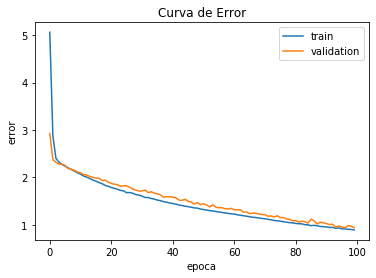

In [98]:
# Hiper-parámetros:
EPOCAS = 100
BATCH  = 10

history = model.fit(X_train, y_train,
                    epochs=EPOCAS,
                    batch_size=BATCH,
                    validation_split=0.2,
                    callbacks=callbacks_list,
                    verbose=0)

print(model.metrics_names)
score = model.evaluate(X_test, y_test,verbose=1)
print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Error')
plt.ylabel('error')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='upper right')

### Curvas de exactitud

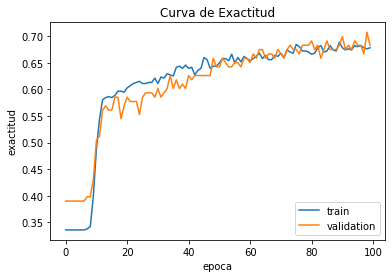

In [95]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Curva de Exactitud')
plt.ylabel('exactitud')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='lower right')